In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
df=pd.read_csv("diabetes.csv")
df.copy()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
#model ve tahmin
gbm=GradientBoostingClassifier().fit(X_train,y_train)

In [10]:
gbm

GradientBoostingClassifier()

In [11]:
y_pred=gbm.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.7489177489177489

In [13]:
#model turing

In [16]:
gbm_model=GradientBoostingClassifier()

In [17]:
gbm_params = {"learning_rate":[0.1,0.01,0.001],
             "max_depth":[3,5,10],
             "n_estimators":[1000,500,400]}

In [18]:
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [19]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [20]:
gbm_tuned=GradientBoostingClassifier(learning_rate=0.01,max_depth=3,n_estimators=500).fit(X_train,y_train)

In [21]:
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

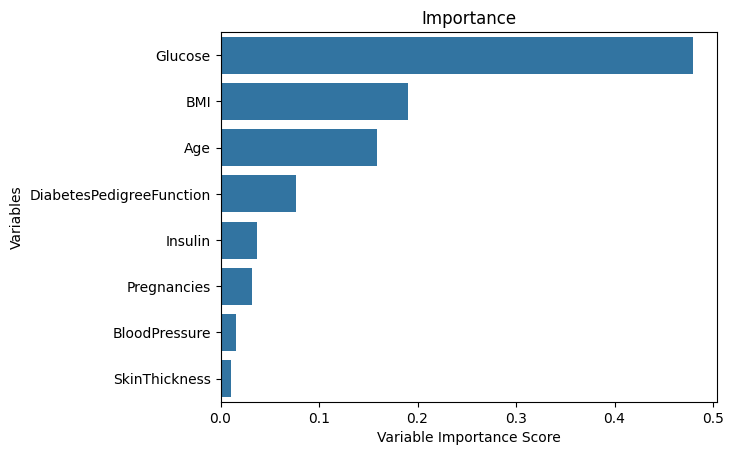

In [23]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()